<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_2X/blob/main/GQtest_data(y_hat)_add_delta_(_3_6)_n250_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_2X/addition_delta_-3.6'

In [4]:
os.listdir(base_path)

['data_add_delta_-3.6_n20.csv',
 'data_add_delta_-3.6_n30.csv',
 'data_add_delta_-3.6_n60.csv',
 'data_add_delta_-3.6_n120.csv',
 'data_add_delta_-3.6_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-3.6_n250.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,39.081008,74.653504,-0.000277,123.734235,123.734572,-0.000337
1,0.0,1.0,88.574284,89.743525,-0.000109,188.317700,188.317649,0.000051
2,0.0,2.0,30.969735,53.639294,-0.000964,94.608066,94.609234,-0.001168
3,0.0,3.0,61.730619,56.871574,0.000651,128.602844,128.602297,0.000547
4,0.0,4.0,94.075659,24.879742,-0.002442,128.952958,128.955605,-0.002647
...,...,...,...,...,...,...,...,...
249995,999.0,245.0,90.954775,50.410972,-0.001138,151.364609,151.365687,-0.001078
249996,999.0,246.0,54.780473,33.370725,0.000098,98.151296,98.151043,0.000253
249997,999.0,247.0,59.010029,68.618891,0.000137,137.629057,137.628919,0.000138
249998,999.0,248.0,38.936969,50.262678,-0.000638,99.199009,99.199555,-0.000545


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,39.081008,74.653504,-0.000277,123.734235,123.734572,-0.000337
1,0.0,1.0,88.574284,89.743525,-0.000109,188.317700,188.317649,0.000051
2,0.0,2.0,30.969735,53.639294,-0.000964,94.608066,94.609234,-0.001168
3,0.0,3.0,61.730619,56.871574,0.000651,128.602844,128.602297,0.000547
4,0.0,4.0,94.075659,24.879742,-0.002442,128.952958,128.955605,-0.002647
...,...,...,...,...,...,...,...,...
249995,999.0,245.0,90.954775,50.410972,-0.001138,151.364609,151.365687,-0.001078
249996,999.0,246.0,54.780473,33.370725,0.000098,98.151296,98.151043,0.000253
249997,999.0,247.0,59.010029,68.618891,0.000137,137.629057,137.628919,0.000138
249998,999.0,248.0,38.936969,50.262678,-0.000638,99.199009,99.199555,-0.000545


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    39.081008  74.653504 -0.000277  123.734235  123.734572 -0.000337
      1.0    88.574284  89.743525 -0.000109  188.317700  188.317649  0.000051
      2.0    30.969735  53.639294 -0.000964   94.608066   94.609234 -0.001168
      3.0    61.730619  56.871574  0.000651  128.602844  128.602297  0.000547
      4.0    94.075659  24.879742 -0.002442  128.952958  128.955605 -0.002647
...                ...        ...       ...         ...         ...       ...
999.0 245.0  90.954775  50.410972 -0.001138  151.364609  151.365687 -0.001078
      246.0  54.780473  33.370725  0.000098   98.151296   98.151043  0.000253
      247.0  59.010029  68.618891  0.000137  137.629057  137.628919  0.000138
      248.0  38.936969  50.262678 -0.000638   99.199009   99.199555 -0.000545
      249.0  77.263018  52.242962 -0.000063  139.505917  139.505920 -0.000002

[250000 rows x 6 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    39.081008  74.653504 -0.000277  123.734235  123.734572 -0.000337
      1.0    88.574284  89.743525 -0.000109  188.317700  188.317649  0.000051
      2.0    30.969735  53.639294 -0.000964   94.608066   94.609234 -0.001168
      3.0    61.730619  56.871574  0.000651  128.602844  128.602297  0.000547
      4.0    94.075659  24.879742 -0.002442  128.952958  128.955605 -0.002647
...                ...        ...       ...         ...         ...       ...
999.0 245.0  90.954775  50.410972 -0.001138  151.364609  151.365687 -0.001078
      246.0  54.780473  33.370725  0.000098   98.151296   98.151043  0.000253
      247.0  59.010029  68.618891  0.000137  137.629057  137.628919  0.000138
      248.0  38.936969  50.262678 -0.000638   99.199009   99.199555 -0.000545
      249.0  77.263018  52.242962 -0.000063  139.505917  139.505920 -0.000002

[250000 rows x 6 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,39.081008,74.653504,-0.000277,123.734235,123.734572,-0.000337
1,0.0,1.0,88.574284,89.743525,-0.000109,188.317700,188.317649,0.000051
2,0.0,2.0,30.969735,53.639294,-0.000964,94.608066,94.609234,-0.001168
3,0.0,3.0,61.730619,56.871574,0.000651,128.602844,128.602297,0.000547
4,0.0,4.0,94.075659,24.879742,-0.002442,128.952958,128.955605,-0.002647
...,...,...,...,...,...,...,...,...
249995,999.0,245.0,90.954775,50.410972,-0.001138,151.364609,151.365687,-0.001078
249996,999.0,246.0,54.780473,33.370725,0.000098,98.151296,98.151043,0.000253
249997,999.0,247.0,59.010029,68.618891,0.000137,137.629057,137.628919,0.000138
249998,999.0,248.0,38.936969,50.262678,-0.000638,99.199009,99.199555,-0.000545


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    39.081008  74.653504 -0.000277  123.734235  123.734572 -0.000337
      1.0    88.574284  89.743525 -0.000109  188.317700  188.317649  0.000051
      2.0    30.969735  53.639294 -0.000964   94.608066   94.609234 -0.001168
      3.0    61.730619  56.871574  0.000651  128.602844  128.602297  0.000547
      4.0    94.075659  24.879742 -0.002442  128.952958  128.955605 -0.002647
...                ...        ...       ...         ...         ...       ...
999.0 245.0  90.954775  50.410972 -0.001138  151.364609  151.365687 -0.001078
      246.0  54.780473  33.370725  0.000098   98.151296   98.151043  0.000253
      247.0  59.010029  68.618891  0.000137  137.629057  137.628919  0.000138
      248.0  38.936969  50.262678 -0.000638   99.199009   99.199555 -0.000545
      249.0  77.263018  52.242962 -0.000063  139.505917  139.505920 -0.000002

[250000 rows x 6 columns]

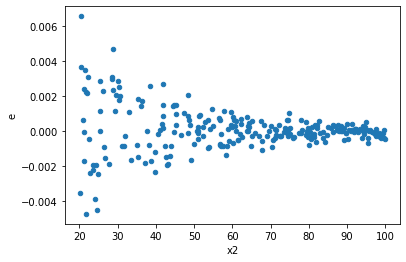

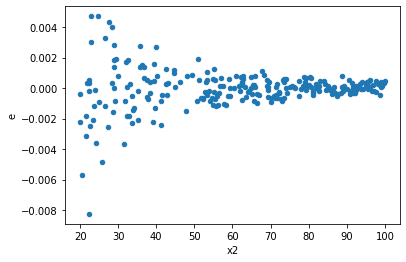

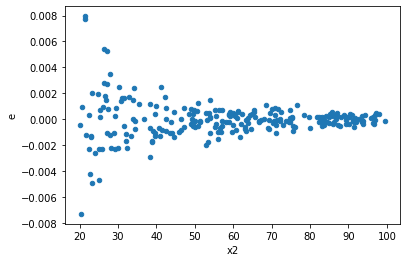

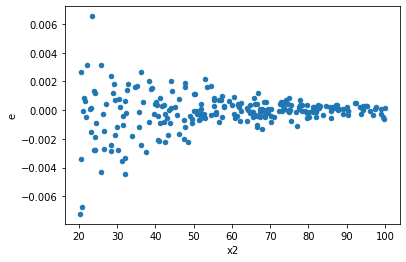

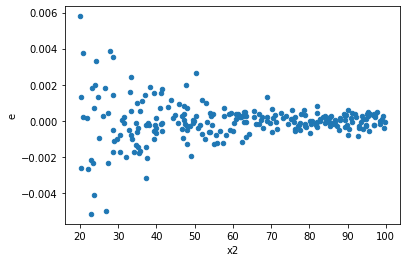

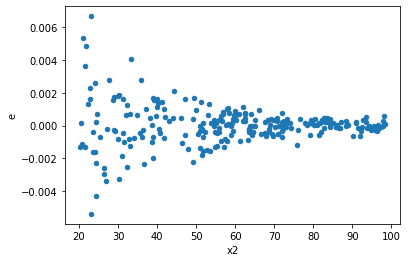

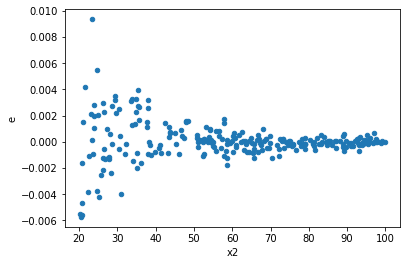

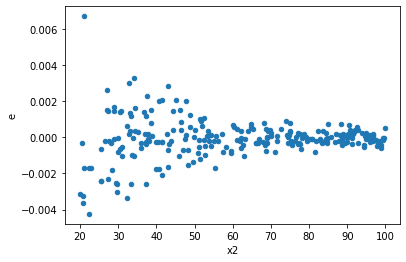

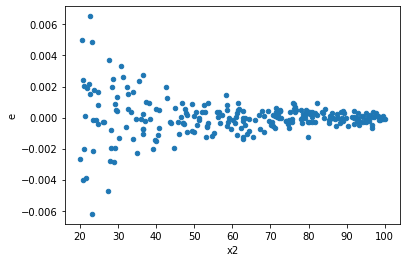

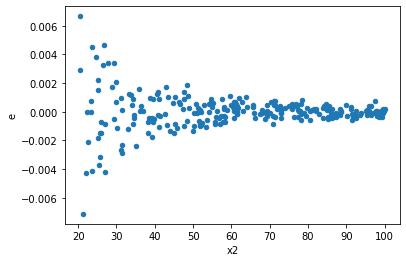

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,98.0,98.0,0.0002817255512265959,1.700007328718773e-05,2.8747505227203667e-06,1.7347013558354825e-07,0.06034267468169518,1.6380523003960083e-34,Reject001=0 : Heteroscedasticity
1.0,98.0,98.0,0.00024329378786641472,1.886559035459643e-05,2.4825896721062725e-06,1.9250602402649418e-07,0.07754242523017052,7.602178413564145e-30,Reject001=0 : Heteroscedasticity
2.0,98.0,98.0,0.0003798537193980658,3.6580445028764733e-05,3.8760583612047525e-06,3.732698472322932e-07,0.09630140014617165,5.927891184226361e-26,Reject001=0 : Heteroscedasticity
3.0,98.0,98.0,0.0002990420194346716,3.4039431660893726e-05,3.051449177904812e-06,3.4734113939687473e-07,0.1138282563943491,4.688599880199975e-23,Reject001=0 : Heteroscedasticity
4.0,98.0,98.0,0.00024035662078961104,3.334627180521989e-05,2.452618579485827e-06,3.402680796451009e-07,0.13873664763496799,9.165153348853315e-20,Reject001=0 : Heteroscedasticity
5.0,98.0,98.0,0.00030591924555030273,2.7818477988123373e-05,3.121624954594926e-06,2.838620202869732e-07,0.09093405659419078,5.712407415091715e-27,Reject001=0 : Heteroscedasticity
6.0,98.0,98.0,0.00044790025731651347,3.0405207111691503e-05,4.570410788944015e-06,3.102572154254235e-07,0.06788387953571846,2.6611950738504893e-32,Reject001=0 : Heteroscedasticity
7.0,98.0,98.0,0.00023391870693869796,2.6599571364435745e-05,2.386925581007122e-06,2.714241975962831e-07,0.11371288646617977,4.5058201138962574e-23,Reject001=0 : Heteroscedasticity
8.0,98.0,98.0,0.0002544316564962694,3.1752237437019146e-05,2.5962413928190754e-06,3.24002422826726e-07,0.12479672488193197,1.6635552814415612e-21,Reject001=0 : Heteroscedasticity


In [17]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    1000
Name: Result_test, dtype: int64